In [1]:
%load_ext autoreload
%autoreload 2
from src.util import utilities as u

In [56]:
from src.data import load_dataset

image_input_path = "../data/processed/image_uploads/letters"
cells = load_dataset.load_dataset(image_input_path)

print(cells["images"].shape)
single = cells['images'][0]
print(single.shape)

single_flat = single.reshape(-1)
print(single_flat.shape)


(711, 16, 16)
(16, 16)
(256,)


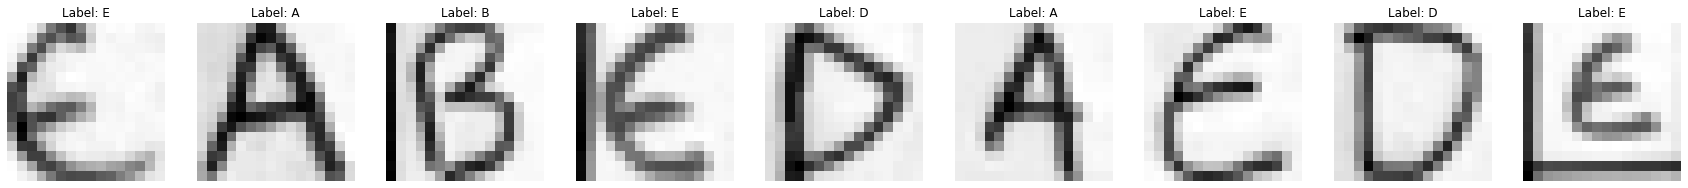

In [57]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# flatten the images
n_samples = len(cells['images'])
data = cells['images'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma='scale')

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, cells['targets'], test_size=0.5, shuffle=True
)


_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

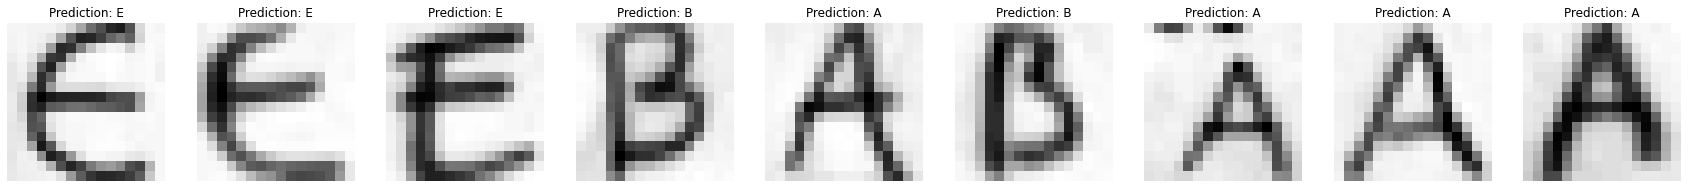

In [58]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [59]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       117
           B       1.00      0.45      0.62        11
           C       1.00      0.71      0.83        24
           D       1.00      0.97      0.98        33
           E       0.91      1.00      0.96       171

    accuracy                           0.96       356
   macro avg       0.98      0.82      0.88       356
weighted avg       0.96      0.96      0.95       356




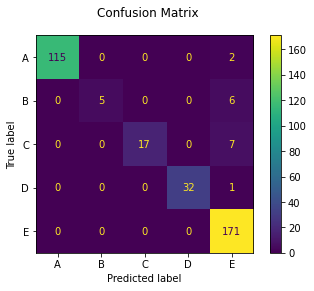

In [60]:

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

Theory: Black borders are causing all kinds of false positives. Need to isolate the letter.